**CNN for Intel Images Dataset**

In [ ]:
from sklearn.datasets import fetch_openml 

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data 
loaded_images_train = np.load('/content/drive/My Drive/Kaggle/Images_test.npy') 
loaded_labels_train = np.load('/content/drive/My Drive/Kaggle/Labels_test.npy') 
print(loaded_images_train.shape)
print(loaded_labels_train.shape)

(14034, 150, 150, 3)
(14034,)


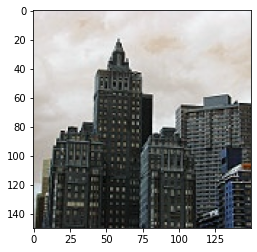

In [ ]:
from random import randint
rnd_number = randint(0,len(loaded_labels_train))
plt.imshow(loaded_images_train[rnd_number])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(loaded_images_train, loaded_labels_train, test_size = 1/6, random_state = 42 )
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(11695, 150, 150, 3) (2339, 150, 150, 3)
[5 5 5 ... 0 5 1] [4 3 0 ... 1 5 2]


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from keras.layers import Activation, Dense

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 360000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               46080128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate = 0.005)
model.compile(optimizer = sgd,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val   = X_val.astype('float32')/255.0
y_val   = y_val.astype('uint')

model.fit(X_train,y_train, batch_size=120, epochs = 10, validation_data=(X_val,y_val))

Epoch 1/10
98/98 [==============================] - 1007s 10s/step - loss: 1.6802 - accuracy: 0.3390 - val_loss: 1.3180 - val_accuracy: 0.5152
Epoch 2/10
98/98 [==============================] - 1010s 10s/step - loss: 1.3577 - accuracy: 0.4853 - val_loss: 1.1982 - val_accuracy: 0.5477
Epoch 3/10
98/98 [==============================] - 1008s 10s/step - loss: 1.2636 - accuracy: 0.5223 - val_loss: 1.1637 - val_accuracy: 0.5413
Epoch 4/10
98/98 [==============================] - 1009s 10s/step - loss: 1.1878 - accuracy: 0.5584 - val_loss: 1.1083 - val_accuracy: 0.5682
Epoch 5/10
98/98 [==============================] - 1002s 10s/step - loss: 1.1384 - accuracy: 0.5732 - val_loss: 1.0468 - val_accuracy: 0.6135
Epoch 6/10
98/98 [==============================] - 1006s 10s/step - loss: 1.0963 - accuracy: 0.5880 - val_loss: 1.0568 - val_accuracy: 0.5921
Epoch 7/10
98/98 [==============================] - 1005s 10s/step - loss: 1.0537 - accuracy: 0.6056 - val_loss: 0.9656 - val_accuracy: 0.6327

In [ ]:
model.fit(X_train,y_train, batch_size=120, epochs = 3, validation_data=(X_val,y_val))

Epoch 1/3
98/98 [==============================] - 1000s 10s/step - loss: 0.8571 - accuracy: 0.6804 - val_loss: 0.8989 - val_accuracy: 0.6648
Epoch 2/3
98/98 [==============================] - 1001s 10s/step - loss: 0.8497 - accuracy: 0.6876 - val_loss: 0.8119 - val_accuracy: 0.6960
Epoch 3/3
98/98 [==============================] - 1002s 10s/step - loss: 0.8242 - accuracy: 0.7023 - val_loss: 0.8206 - val_accuracy: 0.6943


In [ ]:
!mkdir -p saved_model
model.save('saved_model/intel_CNN') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/intel_CNN/assets


In [ ]:
ls saved_model/intel_CNN/

assets/  saved_model.pb  variables/


In [ ]:
new_model = tf.keras.models.load_model('saved_model/intel_CNN')

In [ ]:
#load test data 
loaded_images_test = np.load('/content/drive/My Drive/Kaggle/Images_train.npy') 
loaded_labels_test = np.load('/content/drive/My Drive/Kaggle/Labels_train.npy') 

In [ ]:
print(loaded_images_test.shape)
print(loaded_labels_test.shape)

(3000, 150, 150, 3)
(3000,)


**TEST ACCURACY**

In [ ]:
#inference 
X_test = loaded_images_test.astype('float32')/255.0
y_test = loaded_labels_test.astype('uint')

loss, acc = model.evaluate(X_test,y_test, verbose = 0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.679


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model.predict(X_test)
y_pred = model.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion Matrix
[[320  37  36  55  60 103]
 [ 15 397   4   2   1  28]
 [ 19   0 403  60 122  20]
 [ 37   3  90 381 131   5]
 [  5   1  14  25 195   3]
 [ 41  36   6   2   1 342]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.52      0.61       611
           1       0.84      0.89      0.86       447
           2       0.73      0.65      0.68       624
           3       0.73      0.59      0.65       647
           4       0.38      0.80      0.52       243
           5       0.68      0.80      0.74       428

    accuracy                           0.68      3000
   macro avg       0.68      0